In [1]:
import tensorflow as tf
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

In [2]:
img_array = cv2.imread("DataSet/Training/0/1.jpg") #to check if address is correct

In [3]:
img_array.shape


(48, 48, 3)

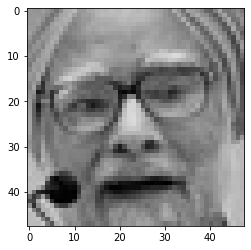

In [4]:
plt.imshow(img_array)

In [5]:
Datadirectory = "DataSet/Training/"

In [6]:
Classes = ["0","1","2","3","4","5","6"]

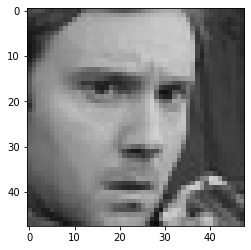

In [7]:
for category in Classes: # testing if it reads a image in folder or not
    path = os.path.join(Datadirectory, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img))
        plt.imshow(cv2.cvtColor(img_array,cv2.COLOR_BGR2RGB))
        plt.show()
        break
    break

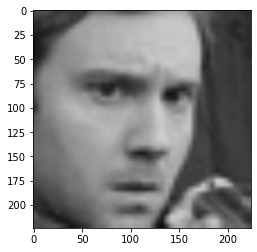

In [8]:
img_size = 224
new_array = cv2.resize(img_array,(img_size,img_size))
plt.imshow(cv2.cvtColor(new_array, cv2.COLOR_BGR2RGB))
plt.show()

In [9]:
new_array.shape

(224, 224, 3)

In [10]:
training_Data = []

def create_training_Data():
    for category in Classes:
        path=os.path.join(Datadirectory,category)
        class_num = Classes.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img))
                new_array = cv2.resize(img_array,(img_size,img_size))
                training_Data.append([new_array,class_num])
            except Exception as e:
                    pass

In [11]:
type(training_Data)

list

In [12]:
create_training_Data()

In [13]:
print(len(training_Data))

28821


In [14]:
for i in range(13000):
    training_Data.pop()

In [15]:
print(len(training_Data))

15821


In [16]:
import random  #so that the program doesnt learn the pattern of the images
random.shuffle(training_Data)

In [17]:
X = []
y = []

for features,label in training_Data:
    X.append(features)
    y.append(label)
    
X = np.array(X).reshape(-1,img_size,img_size,3)

In [18]:
X.shape

(15821, 224, 224, 3)

In [19]:
y[1000]

0

In [20]:
Y=np.array(y)

In [21]:
Y.shape

(15821,)

In [22]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [23]:
model = tf.keras.applications.MobileNetV2()

14548992/14536120 [==============================] - 3s 0us/step


In [24]:
model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 112, 112, 32) 0           bn_Conv1[0][0]                   
_______________________________________________________________________________

In [25]:
base_input = model.layers[0].input

In [26]:
base_output = model.layers[-2].output

In [27]:
base_output

<KerasTensor: shape=(None, 1280) dtype=float32 (created by layer 'global_average_pooling2d')>

In [28]:
final_output = layers.Dense(128)(base_output)
final_ouput = layers.Activation('relu')(final_output)
final_output = layers.Dense(64)(final_ouput)
final_ouput = layers.Activation('relu')(final_output)
final_output = layers.Dense(7,activation='softmax')(final_ouput)

In [29]:
final_output

<KerasTensor: shape=(None, 7) dtype=float32 (created by layer 'dense_2')>

In [30]:
new_model = keras.Model(inputs = base_input, outputs = final_output)

In [31]:
new_model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 112, 112, 32) 0           bn_Conv1[0][0]                   
______________________________________________________________________________________________

In [32]:
new_model.compile(loss="sparse_categorical_crossentropy",optimizer = "adam",metrics = ["accuracy"])

In [33]:
new_model.fit(X,Y,epochs = 1)

495/495 [==============================] - 1705s 3s/step - loss: 0.7760 - accuracy: 0.6908


In [34]:
new_model.fit(X,Y,epochs = 20)

Epoch 1/20
495/495 [==============================] - 1221s 2s/step - loss: 0.6328 - accuracy: 0.7536
Epoch 2/20
495/495 [==============================] - 1507s 3s/step - loss: 0.5617 - accuracy: 0.7837
Epoch 3/20
495/495 [==============================] - 1421s 3s/step - loss: 0.5108 - accuracy: 0.8075
Epoch 4/20
495/495 [==============================] - 1638s 3s/step - loss: 0.4764 - accuracy: 0.8202
Epoch 5/20
495/495 [==============================] - 1095s 2s/step - loss: 0.4354 - accuracy: 0.8379
Epoch 6/20
495/495 [==============================] - 1142s 2s/step - loss: 0.4015 - accuracy: 0.8504
Epoch 7/20
495/495 [==============================] - 1146s 2s/step - loss: 0.3629 - accuracy: 0.8667
Epoch 8/20
495/495 [==============================] - 1138s 2s/step - loss: 0.3288 - accuracy: 0.8783
Epoch 9/20
495/495 [==============================] - 1138s 2s/step - loss: 0.3038 - accuracy: 0.8885
Epoch 10/20
495/495 [==============================] - 1139s 2s/step - loss: 0.274

In [35]:
new_model.save('Final_model_95p07.h5')

C:\Users\asus\anaconda3\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


In [36]:
new_model = tf.keras.models.load_model('Final_model_95p07.h5')

In [37]:
frame = cv2.imread("happy_boy.jfif")

In [38]:
frame.shape

(335, 474, 3)

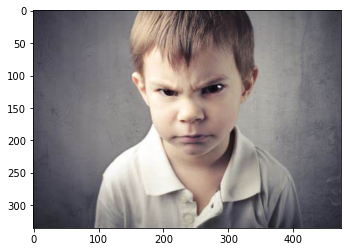

In [39]:
plt.imshow(cv2.cvtColor(frame,cv2.COLOR_BGR2RGB))

In [40]:
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

In [41]:
gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)

In [42]:
gray.shape

(335, 474)

In [43]:
faces = faceCascade.detectMultiScale(gray,1.1,4)
for x,y,w,h in faces:
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = frame[y:y+h, x:x+w]
    cv2.rectangle(frame, (x, y),(x+w,y+h),(255,0,0),2)
    facess = faceCascade.detectMultiScale(roi_gray)
    if len(facess) == 0:
        print("Face not detected")
    else:
        for (ex,ey,ew,eh) in facess:
            face_roi = roi_color[ey:ey+eh,ex:ex+ew]

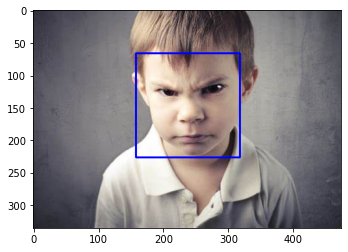

In [44]:
plt.imshow(cv2.cvtColor(frame,cv2.COLOR_BGR2RGB))

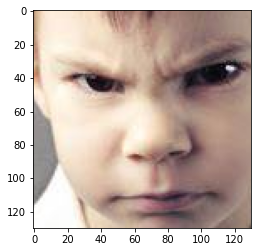

In [45]:
plt.imshow(cv2.cvtColor(face_roi,cv2.COLOR_BGR2RGB))

In [46]:
final_image = cv2.resize(face_roi,(224,224))
final_image = np.expand_dims(final_image,axis = 0)
final_image = final_image/255.0

In [47]:
Predictions = new_model.predict(final_image)

In [48]:
Predictions[0]

array([4.9050686e-01, 1.6607443e-04, 2.3002812e-01, 2.7916032e-01,
       1.3856091e-04, 1.6330229e-12, 3.6224548e-11], dtype=float32)

In [49]:
np.argmax(Predictions)

0

In [50]:
result = np.argmax(Predictions)
if result == 0:
    print("Angry")
elif result == 1:
    print("Disgust")
elif result == 2:
    print("Fear")
elif result == 3:
    print("Happy")
elif result == 4:
    print("Neutral")
elif result == 5:
    print("Sad")
else:
    print("Surprise")

Angry
